# Aula: Da Biblioteca Scikit-Learn ao PyTorch

Este material tem como objetivo ensinar a transição de um fluxo de trabalho básico em Machine Learning usando Scikit-Learn para um fluxo de trabalho semelhante usando PyTorch. Abordaremos desde conceitos fundamentais até exemplos práticos, com exercícios e suas respectivas soluções.

⸻

## Sumário
1.	Introdução aos Conceitos de Machine Learning
- Problemas de Classificação e Regressão
- Função de Custo e Otimizadores
- Overfitting, Underfitting e Generalização
2.	Fluxo de Trabalho em Scikit-Learn
- Carregando Dados
- Separando Dados em Treino e Teste
- Escolhendo e Treinando um Modelo
 Avaliando o Modelo
3. Fluxo de Trabalho em PyTorch
-  Instalação e Estrutura Básica
-  Datasets e DataLoaders
-  Definindo o Modelo (Rede Neural)
-  Função de Custo e Otimizador
-  Treinando e Avaliando o Modelo
4.	Exercícios
- Exercício 1 - Ajustando um Modelo de Classificação no Scikit-Learn
- Exercício 2 - Construindo uma Rede Neural Simples no PyTorch
5.	Conclusão

⸻



## Introdução aos Conceitos de Machine Learning

### Problemas de Classificação e Regressão

No Machine Learning, lidamos principalmente com dois tipos de problemas:
- Classificação: quando a saída esperada é uma classe ou categoria. Exemplos:
- Prever se um e-mail é spam ou não.
- Prever se um paciente tem ou não uma doença específica (diabetes, hipertensão etc.).
- Regressão: quando a saída esperada é um valor contínuo. Exemplos:
- Prever o valor de um imóvel.
- Prever o preço de ações na bolsa.

Função de Custo e Otimizadores

Em ambos os tipos de problemas (classificação e regressão), precisamos de uma função de custo (loss function) que meça o quão bom está o desempenho do modelo nos dados de treino. Exemplos de funções de custo:
- MSE (Mean Squared Error): muito usado em regressão.
- Cross-entropy: muito usado em classificação.

Para ajustar ou treinar o modelo, utilizamos otimizadores, que ajustam os pesos do modelo de acordo com a função de custo. No Scikit-Learn, esses otimizadores são internos e invisíveis para quem está usando (ex.: descida do gradiente, métodos fechados etc.). No PyTorch, configuramos explicitamente o otimizador, como SGD, Adam etc.

Overfitting, Underfitting e Generalização
- Overfitting: quando o modelo se especializa demais nos dados de treino e não generaliza bem para dados novos (dados de teste).
- Underfitting: quando o modelo não captura de forma suficiente a relação entre os atributos e o alvo.
- Generalização: é a capacidade de um modelo aprender uma função que faça sentido para dados novos (não vistos durante o treino).



⸻

# Fluxo de Trabalho em Scikit-Learn

### Carregando Dados

O Scikit-Learn possui vários datasets de exemplo. Para fins didáticos, usaremos o famoso conjunto de dados Iris, que é um problema de classificação de flores com 3 possíveis classes.



In [ ]:
# Exemplo de código para carregar dados
from sklearn.datasets import load_iris

iris = load_iris() # Carrega o dataset Iris
""" 
O que temos nesse dataset?
- Iris é um dataset clássico de aprendizado de máquina.
- Contém 150 amostras de flores de íris, com 4 atributos (comprimento e largura da sépala e pétala).
# Atributos:
- Sepal length (cm)
- Sepal width (cm)
- Petal length (cm)
- Petal width (cm)

- As amostras estão divididas em 3 classes (espécies de íris):
- Iris Setosa
- Iris Versicolor
- Iris Virginica

- Cada classe tem 50 amostras.
- O dataset é amplamente utilizado para testar algoritmos de classificação.

"""


X = iris.data  # Features (atributos)
y = iris.target  # Alvo (classes)

In [5]:
# vamos ver um exemplo de uma amostra de iris
print(X[0])  # Exibe os atributos da primeira amostra
print(y[0])  # Exibe a classe da primeira amostra
# Exibe o nome da classe correspondente
print(iris.target_names[y[0]])  # Exibe o nome da classe correspondente
# Exibe os nomes dos atributos
print(iris.feature_names)  # Exibe os nomes dos atributos

[5.1 3.5 1.4 0.2]
0
setosa
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


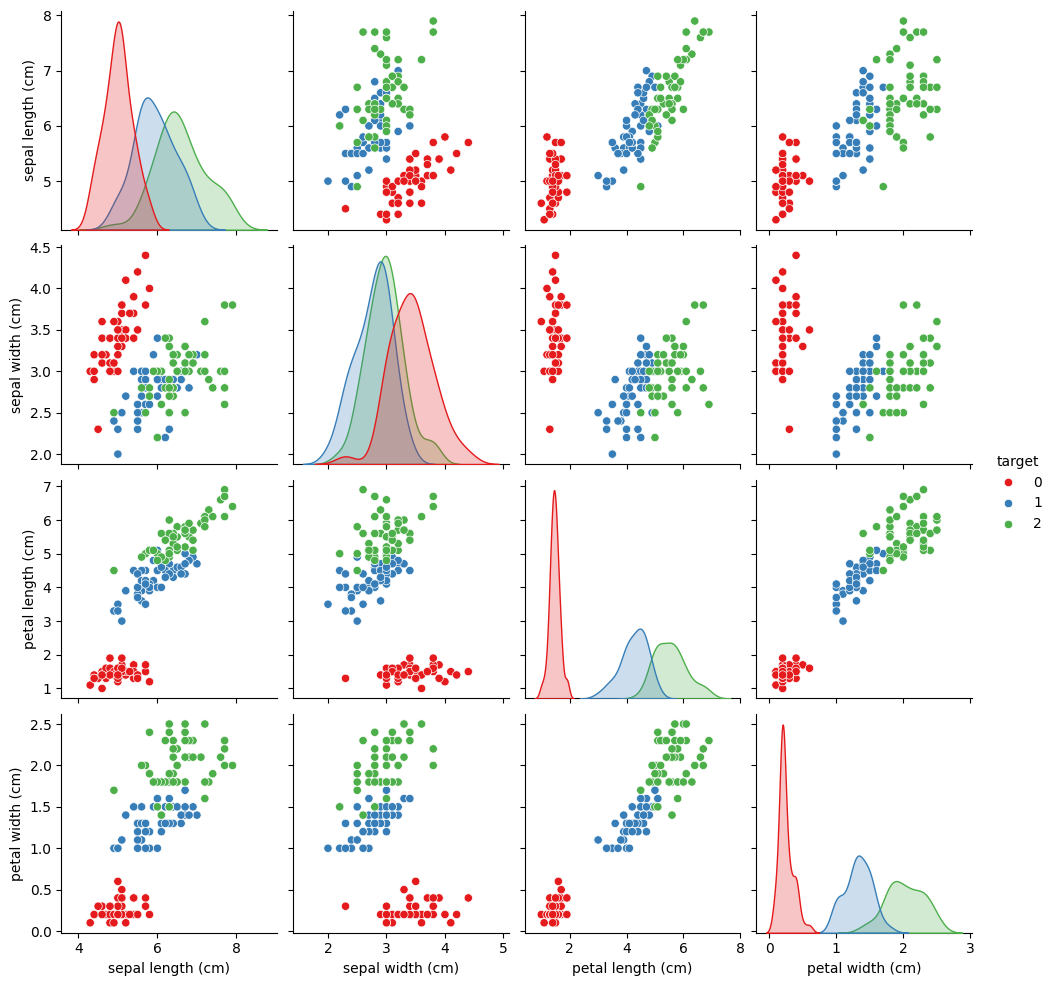

In [3]:
# para visualizar os dados, podemos usar o pandas
import pandas as pd
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y
print(df.head())
# Visualizando os dados
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df, hue='target', palette='Set1')
plt.show()

### Separando Dados em Treino e Teste

É prática comum separar os dados em treino e teste, para podermos avaliar de forma imparcial quão bem o modelo generaliza.

In [8]:
from sklearn.model_selection import train_test_split

# Teste com 20% dos dados, mantendo o restante (80%) para treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Escolhendo e Treinando um Modelo

No Scikit-Learn, podemos escolher facilmente entre diversos modelos, como Regressão Logística, SVM, Árvore de Decisão, Random Forest etc.

In [9]:
from sklearn.linear_model import LogisticRegression

# Criando o modelo
model = LogisticRegression(max_iter=200)  # Aumentamos max_iter para evitar warning
model.fit(X_train, y_train)  # Treinando o modelo

LogisticRegression(max_iter=200)

### Avaliando o Modelo

Para avaliar o modelo, podemos usar acurácia (no caso de classificação) ou erro médio (no caso de regressão). Aqui, usamos acurácia:

In [10]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Acurácia do modelo:", acc)

Acurácia do modelo: 1.0


# Fluxo de Trabalho em PyTorch

### Instalação e Estrutura Básica

O PyTorch é um framework de Deep Learning que nos dá maior controle sobre a construção de modelos de rede neural, funções de custo, otimização, etc. A estrutura básica de uso do PyTorch envolve:
 1. Definir os tensores de entrada e saída.
 2. Criar um Dataset (e opcionalmente um DataLoader para facilitar o manuseio dos dados).
 3. Definir o modelo (rede neural).
 4. Definir a função de custo (loss function).
 5. Definir o otimizador (e.g., torch.optim.SGD ou torch.optim.Adam).
 6. Executar o loop de treinamento:
- Forward pass: calcular a saída do modelo
- Cálculo da perda (loss)
- Backward pass: atualizar os pesos usando o otimizador
- Avaliar o desempenho

### Datasets e DataLoaders

O PyTorch tem uma abstração chamada Dataset, onde definimos como acessar cada amostra e a respectiva label. Para problemas simples, podemos transformar diretamente arrays NumPy em tensores PyTorch.

In [13]:
import torch
from torch.utils.data import Dataset, DataLoader

class IrisDataset(Dataset):
    def __init__(self, X, y):
        # Convertemos para tensores float
        self.X = torch.FloatTensor(X)
        """ 
        O que é um floatTensor?
        - Um tensor de ponto flutuante (float) é uma estrutura de dados que armazena números reais. Ele é como um array, mas pode ser usado em operações matemáticas complexas.
        - O PyTorch usa tensores para representar dados e realizar cálculos. Eles são semelhantes aos arrays do NumPy, mas com suporte para GPU.
        - Tensores são fundamentais para o aprendizado profundo, pois permitem operações eficientes em grandes conjuntos de dados.
        - FloatTensor é um tipo específico de tensor que armazena números em ponto flutuante (decimais), o que é útil para representar dados contínuos, como atributos de flores.
        - FloatTensor é um tipo de tensor que armazena números em ponto flutuante (decimais), o que é útil para representar dados contínuos, como atributos de flores.
        """
        # Convertemos y para long (inteiros para classificação)
        self.y = torch.LongTensor(y)
        """ 
        O que é um longTensor?
        - Um tensor de inteiros (long) é uma estrutura de dados que armazena números inteiros. Ele é como um array, mas pode ser usado em operações matemáticas complexas.
        - O PyTorch usa tensores para representar dados e realizar cálculos. Eles são semelhantes aos arrays do NumPy, mas com suporte para GPU.
        - Tensores são fundamentais para o aprendizado profundo, pois permitem operações eficientes em grandes conjuntos de dados.
        - LongTensor é um tipo específico de tensor que armazena números inteiros, o que é útil para representar classes de classificação.
        """
        self.n_samples = X.shape[0] # aqui, X.shape[0] é o número de amostras (linhas) no dataset
        """
        O que é X.shape[0]?
        - X.shape é uma propriedade que retorna as dimensões de um array ou tensor.
        - X.shape[0] retorna o número de linhas (amostras) no array ou tensor X.
        - Isso é útil para saber quantas amostras temos no dataset, o que é importante para treinar modelos de aprendizado de máquina.
        """

        
    def __getitem__(self, index):
        return self.X[index], self.y[index]
    
    def __len__(self):
        return self.n_samples

# Exemplo de criação do dataset
train_dataset = IrisDataset(X_train, y_train)
test_dataset = IrisDataset(X_test, y_test)

# DataLoader ajuda a gerar batches de forma automatizada
"""
O que é um DataLoader?
- Um DataLoader é uma ferramenta do PyTorch que facilita o carregamento de dados em lotes (batches) para treinamento de modelos.
- Ele permite iterar sobre grandes conjuntos de dados de forma eficiente, dividindo-os em partes menores (batches) para processamento.
- Isso é útil para treinar modelos de aprendizado profundo, pois permite que o modelo processe os dados em partes, em vez de carregar tudo na memória de uma vez.
- O DataLoader também pode embaralhar os dados, aplicar transformações e carregar dados em paralelo, tornando o treinamento mais rápido e eficiente.
"""
train_loader = DataLoader(dataset=train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=16, shuffle=False)

### Definindo o Modelo (Rede Neural)

No PyTorch, definimos modelos criando classes que herdam de nn.Module. Cada camada é geralmente definida dentro do __init__, e o forward pass é definido no método forward.

In [15]:
import torch.nn as nn

class SimpleNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)  # primeira camada densa, é um Linear, ou seja, uma camada totalmente conectada. Ela recebe como entrada o tamanho do vetor de entrada (input_size) e o número de neurônios na camada oculta (hidden_size).
        self.relu = nn.ReLU()                         # função de ativação ReLU. relu é uma função de ativação que introduz não-linearidade na rede. Ela é importante para permitir que a rede aprenda padrões complexos nos dados.
        self.fc2 = nn.Linear(hidden_size, num_classes) # segunda camada densa, que recebe como entrada o número de neurônios da camada oculta (hidden_size) e o número de classes (num_classes). Essa camada produz a saída final da rede, que representa as probabilidades para cada classe.
        
    def forward(self, x):
        out = self.fc1(x) # Passa a entrada pela primeira camada densa
        out = self.relu(out) # Aplica a função de ativação ReLU
        out = self.fc2(out) # Passa pela segunda camada densa
        return out

In [16]:
!pip install torchviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 2.8 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [17]:
!pip install graphviz


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [19]:
!brew install graphviz

==> Auto-updating Homebrew...
Adjust how often this is run with HOMEBREW_AUTO_UPDATE_SECS or disable with
HOMEBREW_NO_AUTO_UPDATE. Hide these hints with HOMEBREW_NO_ENV_HINTS (see `man brew`).
==> Auto-updated Homebrew!
Updated 2 taps (homebrew/core and homebrew/cask).
==> New Formulae
api-linter      erlfmt          nip4            sacad           xtl
buffrs          intermodal      protoc-gen-doc  uhubctl
==> New Casks
deepchat                                 liviable

You have 14 outdated formulae installed.

==> Downloading https://ghcr.io/v2/homebrew/core/graphviz/manifests/12.2.1
######################################################################### 100.0%
==> Fetching dependencies for graphviz: gd, jasper, netpbm, gts, gdk-pixbuf, librsvg and libtool
==> Downloading https://ghcr.io/v2/homebrew/core/gd/manifests/2.3.3_6
######################################################################### 100.0%
==> Fetching gd
==> Downloading https://ghcr.io/v2/homebrew/core/gd/blobs/sha2

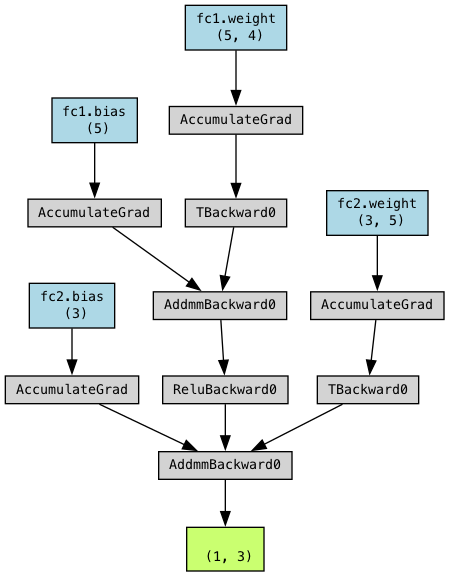

In [20]:
# para rodar abaixo, precisamos fazer pip install torchviz e graphviz
# como fazer uma visualização do modelo?
from torchviz import make_dot
# Criando uma instância do modelo
model = SimpleNet(input_size=4, hidden_size=5, num_classes=3)
# Criando um tensor de exemplo para visualizar o modelo
x = torch.randn(1, 4)  # Um tensor de entrada com 4 atributos
# Gerando o gráfico do modelo
dot = make_dot(model(x), params=dict(model.named_parameters()))
# Exibindo o gráfico
dot.render("model_architecture", format="png")  # Salva o gráfico como imagem
# Exibindo o gráfico
from IPython.display import Image
Image(filename="model_architecture.png")  # Exibe a imagem do gráfico
# Exibindo o gráfico

## 🧠 Visualização Explicada do Grafo Computacional do Modelo `SimpleNet`

Este grafo representa as **operações realizadas automaticamente pelo PyTorch** para computar os gradientes durante o treinamento da rede neural `SimpleNet`. Abaixo, explicamos os blocos principais da imagem em estilo de aula.

---

### 🎯 Objetivo da Visualização

Visualizar o fluxo de dados e gradientes da rede neural:
- Como os tensores fluem entre as camadas
- Como os gradientes são acumulados para cada parâmetro treinável

---

### 🧩 Etapas do Grafo

#### 1. **Input da Rede**
O tensor de entrada tem formato `(1, 4)`  
*(Ex: uma amostra com 4 atributos)*

---

#### 2. **Camada Linear 1 (`fc1`)**

- **Pesos:** `fc1.weight (5, 4)`  
- **Bias:** `fc1.bias (5)`  
- **Operações:**
  - `AddmmBackward0`: executa `x @ W.T + b`
  - `TBackward0`: gradiente da transposição usada na multiplicação
  - `AccumulateGrad`: onde os gradientes são armazenados

> ✏️ Saída: tensor com shape `(1, 5)`

---

#### 3. **Função de Ativação: ReLU**

- **Operação:** `ReluBackward0`  
- Aplica a não-linearidade ponto a ponto  
- Gradiente é passado apenas onde a saída foi positiva

> ✏️ Saída após ReLU: tensor ainda com shape `(1, 5)`

---

#### 4. **Camada Linear 2 (`fc2`)**

- **Pesos:** `fc2.weight (3, 5)`  
- **Bias:** `fc2.bias (3)`  
- **Operações:**
  - `AddmmBackward0`: executa `x @ W.T + b`
  - `TBackward0` e `AccumulateGrad`: como na `fc1`

> ✏️ Saída final: tensor com shape `(1, 3)`  
*(3 neurônios, cada um representando uma classe no output)*

---

### 🔄 Fluxo de Gradientes

Cada camada possui:
- Um bloco `Backward` (como `AddmmBackward0`, `ReluBackward0`)
- Blocos `AccumulateGrad` ligados aos parâmetros
  - Mostra onde os gradientes serão armazenados para atualização posterior

---

### 🟦 Legenda Visual

| Bloco                          | Cor       | Significado                        |
|-------------------------------|------------|------------------------------------|
| `fc*.weight`, `fc*.bias`      | Azul       | Parâmetros treináveis              |
| `*Backward*`                  | Cinza      | Operações no grafo do autograd     |
| `AccumulateGrad`              | Cinza      | Armazenamento dos gradientes       |
| Saída final                   | Verde-limão| Tensor de saída do modelo          |

---

### ✅ Conclusão

Esse grafo é gerado automaticamente pelo PyTorch e mostra com clareza:
- Como cada camada opera
- Como os gradientes serão computados e aplicados
- Como o PyTorch conecta todos os elementos da rede para o `backpropagation`

Ideal para depuração, entendimento da arquitetura e ensino.

---

### Função de Custo e Otimizador

Para um problema de classificação com 3 classes (como o Iris), normalmente usamos nn.CrossEntropyLoss como função de custo, pois ela combina LogSoftmax e NLLLoss. Para otimização, podemos usar torch.optim.Adam, torch.optim.SGD etc.

In [21]:
 # 4 atributos (Iris), 3 classes. 
 # Definimos 8 como tamanho da camada oculta, mas isso pode ser ajustado conforme necessário. 
 # Esse número foi escolhido de forma arbitrária, e pode ser ajustado conforme necessário. 
 # O número de classes é 3, pois temos 3 tipos de flores no dataset Iris (Setosa, Versicolor e Virginica). 
 # O tamanho da camada oculta (hidden_size) pode ser ajustado conforme necessário, 
 # mas 8 é um bom ponto de partida para começar a experimentar.
# o input_size é o número de atributos (4 para o dataset Iris), que são as características das flores (comprimento e largura da sépala e pétala).
# O hidden_size é o número de neurônios na camada oculta (8 nesse caso),
# e num_classes é o número de classes de saída (3 para o dataset Iris).
model = SimpleNet(input_size=4, hidden_size=8, num_classes=3) 

# Definindo a função de custo e o otimizador
# A função de custo utilizada é a CrossEntropyLoss, que é adequada para problemas de classificação multiclasse.
# O otimizador utilizado é o Adam, que é um dos otimizadores mais populares e eficientes para treinamento de redes neurais.
# A função de custo (loss function) mede o quão bem a rede neural está se saindo em relação aos dados de treinamento.
criterion = nn.CrossEntropyLoss()  # função de custo

# O otimizador (optimizer) é responsável por atualizar os pesos da rede neural durante o treinamento,
# com base na função de custo e no gradiente calculado.
# A função de custo CrossEntropyLoss é adequada para problemas de classificação multiclasse.
# O otimizador Adam é uma escolha popular devido à sua eficiência e capacidade de lidar com grandes conjuntos de dados.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # Adam com taxa de aprendizado 0.01

### Treinando e Avaliando o Modelo

O loop de treinamento é tipicamente assim:
 1. Zeramos os gradientes (optimizer.zero_grad()).
 2. Fazemos o forward pass (outputs = model(inputs)).
 3. Calculamos a perda (loss = criterion(outputs, labels)).
 4. Backward pass (loss.backward()).
 5. Atualizamos os parâmetros (optimizer.step()).

In [22]:
num_epochs = 50  # quantidade de vezes que passaremos por todo o dataset

# Por que 50 épocas?
# O número de épocas (num_epochs) é um hiperparâmetro que pode ser ajustado conforme necessário.
# O valor de 50 épocas é um ponto de partida razoável para muitos problemas de aprendizado de máquina,
# mas pode ser ajustado com base na convergência do modelo e na performance nos dados de validação.
# Precisamos fazer com que o modelo rode várias vezes pelos dados de treinamento para que ele aprenda 
# os padrões presentes nos dados.
# O treinamento de um modelo de aprendizado de máquina geralmente envolve várias iterações sobre os dados de treinamento.

for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(train_loader): 
        # Forward

        # O que é forward?
        # O forward pass é o processo de passar os dados de entrada pela rede neural para obter as previsões.
        # Durante o forward pass, os dados de entrada são multiplicados pelos pesos da rede neural e passam por funções de ativação,
        # resultando nas previsões da rede.
        outputs = model(inputs) # Passa os dados de entrada pela rede

        # O que é loss?
        # A loss (ou função de custo) mede a diferença entre as previsões da rede e os rótulos reais (labels).
        # O objetivo do treinamento é minimizar essa diferença, ajustando os pesos da rede neural.
        loss = criterion(outputs, labels) # Calcula a perda (loss) entre as previsões e os rótulos reais

        # Zera gradientes anteriores
        # O que é optimizer?
        # O otimizador é responsável por atualizar os pesos da rede neural com base no gradiente da função de custo.
        # O otimizador calcula os gradientes dos pesos em relação à função de custo e ajusta os pesos na direção oposta a esses gradientes,
        # com o objetivo de minimizar a função de custo.
        optimizer.zero_grad()
     
        # Backward
        # O que é loss.backward()?
        # O loss.backward() calcula os gradientes da função de custo em relação aos pesos da rede neural.
        # Esses gradientes são usados pelo otimizador para atualizar os pesos da rede.
        loss.backward()
     
        # Atualiza parâmetros
        # O que é optimizer.step()?
        # O optimizer.step() atualiza os pesos da rede neural com base nos gradientes calculados pelo loss.backward().        
        optimizer.step()
        
        
    
    # Podemos imprimir a cada época para ver a evolução
    if (epoch+1) % 10 == 0:
        print(f"Época [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

Época [10/50], Loss: 0.4187
Época [20/50], Loss: 0.1415
Época [30/50], Loss: 0.2997
Época [40/50], Loss: 0.1742
Época [50/50], Loss: 0.2292


In [ ]:
# É certo dizer que quanto mais épocas necessárias, mais o modelo aprende?
# Não necessariamente.
# O número de épocas necessárias para treinar um modelo depende de vários fatores, incluindo a complexidade do modelo,
# a quantidade e qualidade dos dados, a taxa de aprendizado e a função de custo.
# Em alguns casos, o modelo pode aprender rapidamente e atingir uma boa performance em poucas épocas,
# enquanto em outros casos, pode levar muitas épocas para convergir.
# Além disso, é importante monitorar a performance do modelo em dados de validação para evitar overfitting,
# que é quando o modelo aprende a memorizar os dados de treinamento em vez de generalizar para novos dados.

Para avaliar o modelo, podemos calcular a acurácia no conjunto de teste:

In [23]:
with torch.no_grad():  # desliga o autograd para velocidade
    correct = 0
    total = 0
    for inputs, labels in test_loader:
        outputs = model(inputs)
        # outputs.shape = [batch_size, num_classes]
        _, predicted = torch.max(outputs.data, 1)  # pega o índice com maior valor
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
    print("Acurácia no conjunto de teste: {:.2f}%".format(100 * correct / total))

Acurácia no conjunto de teste: 100.00%


# Exercícios

A seguir, temos dois exercícios práticos para reforçar a transição do Scikit-Learn para o PyTorch.

## Exercício 1 - Ajustando um Modelo de Classificação no Scikit-Learn

Tarefa: Usar o dataset Iris para:
 1. Carregar os dados
 2. Separar em treino e teste
 3. Ajustar um modelo de Árvore de Decisão do Scikit-Learn
 4. Calcular a acurácia em treino e teste


### Explicação:
Uma Árvore de Decisão é simples de entender e de interpretar. Vamos treinar a árvore de decisão no mesmo dataset que vimos e comparar a acurácia obtida.

In [24]:
# SOLUÇÃO DO EXERCÍCIO 1

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Passo 1: Carregar os dados
iris = load_iris()
X = iris.data
y = iris.target

# Passo 2: Separar em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Passo 3: Ajustar o modelo (Árvore de Decisão)
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

# Passo 4: Calcular acurácia em treino e teste
y_pred_train = dtc.predict(X_train)
y_pred_test = dtc.predict(X_test)

train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print("Acurácia em Treino: {:.2f}%".format(train_acc * 100))
print("Acurácia em Teste: {:.2f}%".format(test_acc * 100))

Acurácia em Treino: 100.00%
Acurácia em Teste: 100.00%


# Exercício 2 - Construindo uma Rede Neural Simples no PyTorch

Tarefa: Crie uma rede neural em PyTorch para classificar o mesmo dataset Iris e calcule a acurácia final. Siga estes passos:
 1. Crie o dataset personalizado (subclasse de Dataset) ou transforme arrays NumPy em Tensores.
 2. Crie DataLoader para treino e teste.
 3. Defina um modelo simples com duas camadas densas.
 4. Use nn.CrossEntropyLoss como função de custo e Adam como otimizador.
 5. Treine o modelo por 30 épocas e calcule a acurácia final em teste.

### Explicação:
Neste exercício, vamos repetir a configuração que vimos, mas adaptada para atender exatamente às instruções solicitadas.

In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

# SOLUÇÃO DO EXERCÍCIO 2

# Passo 1: Definir o dataset usando subclass de Dataset
class IrisDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X).float()
        self.y = torch.from_numpy(y).long()
        self.n_samples = len(y)
        
    def __getitem__(self, index):
        return self.X[index], self.y[index]
    
    def __len__(self):
        return self.n_samples

# Carrega dados do iris, separa em treino e teste
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Instancia os datasets
train_dataset = IrisDataset(X_train, y_train)
test_dataset = IrisDataset(X_test, y_test)

# Passo 2: Crie DataLoaders
train_loader = DataLoader(dataset=train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=16, shuffle=False)

# Passo 3: Defina o modelo simples
class MyNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MyNet, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

model = MyNet(input_dim=4, hidden_dim=8, output_dim=3)

# Passo 4: Definir função de custo e otimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Passo 5: Treinar o modelo por 30 épocas
num_epochs = 100
for epoch in range(num_epochs):
    for batch_x, batch_y in train_loader:
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        print(f"Época [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# Avaliar no conjunto de teste
correct = 0
total = 0

with torch.no_grad():
    for batch_x, batch_y in test_loader:
        outputs = model(batch_x)
        _, predicted = torch.max(outputs.data, 1)
        total += batch_y.size(0)
        correct += (predicted == batch_y).sum().item()

acc = 100 * correct / total
print(f"Acurácia em teste: {acc:.2f}%")

Época [10/100], Loss: 0.4547
Época [20/100], Loss: 0.1746
Época [30/100], Loss: 0.0344
Época [40/100], Loss: 0.0893
Época [50/100], Loss: 0.4685
Época [60/100], Loss: 0.1205
Época [70/100], Loss: 0.0751
Época [80/100], Loss: 0.2924
Época [90/100], Loss: 0.1988
Época [100/100], Loss: 0.0070
Acurácia em teste: 96.67%


# Conclusão

Nesta aula, vimos como funciona o fluxo de trabalho básico em Scikit-Learn e como podemos migrar para um ambiente de PyTorch, que oferece mais flexibilidade e controle na construção de modelos de rede neural.
	•	Scikit-Learn: focado em algoritmos clássicos de ML (Regressão, Classificação, Clustering etc.), além de pipelines simples e bem estruturados.
	•	PyTorch: focado no desenvolvimento de redes neurais e modelos profundos, com a possibilidade de controlar cada detalhe do processo (camadas, funções de ativação, otimizadores).

Com os exercícios, reforçamos a compreensão dessas duas abordagens e construímos um pipeline de classificação passo a passo. Esperamos que agora você se sinta confortável para decidir em qual biblioteca se basear dependendo do seu problema e grau de complexidade necessário.